In [1]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import numpy as np
from scipy.stats import sem
from sklearn import metrics
import pandas as pd
target_names = ['non-patient', 'patient']

In [2]:
def CI(y_true, y_pred):
    n_bootstraps = 1000
    rng_seed = 42  # control reproducibility
    bootstrapped_scores = []

    rng = np.random.RandomState(rng_seed)
    for i in range(n_bootstraps):
        # bootstrap by sampling with replacement on the prediction indices
        indices = rng.randint(0, len(y_pred), len(y_pred))
        if len(np.unique(y_true[indices])) < 2:
            # We need at least one positive and one negative sample for ROC AUC
            # to be defined: reject the sample
            continue

        score = roc_auc_score(y_true[indices], y_pred[indices])
        bootstrapped_scores.append(score)
        #print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))

    sorted_scores = np.array(bootstrapped_scores)
    sorted_scores.sort()
    confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
    confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
    print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
        confidence_lower, confidence_upper))

In [3]:
fivefolds_label = pd.read_csv('../data/biclass2.txt', sep=' ')
fivefolds_label.rename(columns = {'file':'name'}, inplace = True)
fivefolds_label['name'] =  fivefolds_label['name'].str.replace('CTT', '').astype(int)
fivefolds_label['label'] =  fivefolds_label['label'].astype(bool).astype(str)
fivefolds_label['label'] =  fivefolds_label['label'].str.replace('False', 'NC')
fivefolds_label['label'] =  fivefolds_label['label'].str.replace('True', 'AD')

## whisper

In [4]:
WhisperForAudioClassification_v2_15k = pd.read_csv('whisper-WhisperForAudioClassification-v2-15k.csv')
# fivefolds_1k['result'] = np.where(fivefolds_1k['hyps'] >= 0.5,1,0)
WhisperForAudioClassification_v2_15k['name'] =  WhisperForAudioClassification_v2_15k['name'].str.split('\\').str.get(-1)
WhisperForAudioClassification_v2_15k['name'] =  WhisperForAudioClassification_v2_15k['name'].str.split('C').str.get(0).astype(int)
WhisperForAudioClassification_v2_15k = WhisperForAudioClassification_v2_15k.sort_values(by=['name'])
WhisperForAudioClassification_v2_15k = WhisperForAudioClassification_v2_15k.reset_index(drop=True)
WhisperForAudioClassification_v2_15k['label'] = fivefolds_label['label']
WhisperForAudioClassification_v2_15k.head(50)

,name,hyps,truth,ifcorrect,label
0,1,30.795828,30.0,False,NC
1,2,30.362089,30.0,False,NC
2,3,30.348000,30.0,False,NC
3,4,27.745941,23.0,False,AD
4,5,27.936304,27.0,False,AD
5,6,28.645771,30.0,False,NC
6,7,30.090240,30.0,False,NC
7,9,30.045135,5.0,False,NC
8,10,29.278717,24.0,False,AD
9,11,28.241537,16.0,False,AD


In [5]:
WhisperForAudioClassification_v2_15k.tail(38)

,name,hyps,truth,ifcorrect,label
49,58,26.412119,29.0,False,AD
50,63,27.669956,13.0,False,AD
51,64,25.794256,19.0,False,AD
52,65,26.008755,25.0,False,AD
53,67,27.040569,24.0,False,AD
54,68,28.039154,30.0,False,AD
55,69,28.237877,30.0,False,NC
56,70,29.179243,30.0,False,NC
57,71,31.485897,30.0,False,NC
58,72,29.715219,30.0,False,NC


In [6]:
WhisperForAudioClassification_v2_15k_result = WhisperForAudioClassification_v2_15k['ifcorrect'].tolist()
WhisperForAudioClassification_v2_15k_hyps = WhisperForAudioClassification_v2_15k['hyps'].tolist()
# fivefolds_1_truth = [int(i) for i in fivefolds_1k['truth'].tolist()]
bert_v2_15k_truth = WhisperForAudioClassification_v2_15k['truth'].tolist()

In [7]:
bert_v2_15k_label = WhisperForAudioClassification_v2_15k['label'].tolist()
bert_v2_15k_hyps = [float(i) for i in WhisperForAudioClassification_v2_15k['hyps'].tolist()]
WhisperForAudioClassification_v2_15k_truth = [float(i) for i in WhisperForAudioClassification_v2_15k['truth'].tolist()]
WhisperForAudioClassification_v2_15k_name = [str(i).replace("CTT", "") for i in WhisperForAudioClassification_v2_15k['name'].tolist()]

In [8]:
# print(classification_report(fivefolds_1_truth, fivefolds_1_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_1_truth, fivefolds_1_result).ravel()
# print('sensitivuty: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_1_truth), np.array(fivefolds_1_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

print('evs: ', metrics.explained_variance_score(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps))
print('mae: ', metrics.mean_absolute_error(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps))
print('mse: ', metrics.mean_squared_error(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps)))
print('r2: ', metrics.r2_score(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps))
total_mae = metrics.mean_absolute_error(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps)

evs:  0.1218921736520111
mae:  3.3803074277680496
mse:  36.13461736909285
rmse:  6.011207646479437
r2:  0.003966179398293579


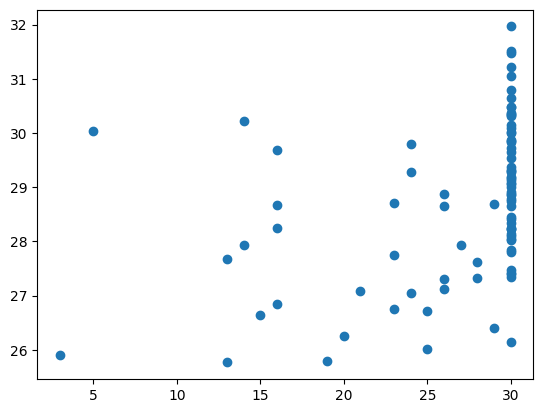

In [9]:
import matplotlib.pyplot as plt
plt.scatter(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps)
# plt.plot(list(range(len(fivefolds_1_truth))), fivefolds_1_hyps)
plt.show()

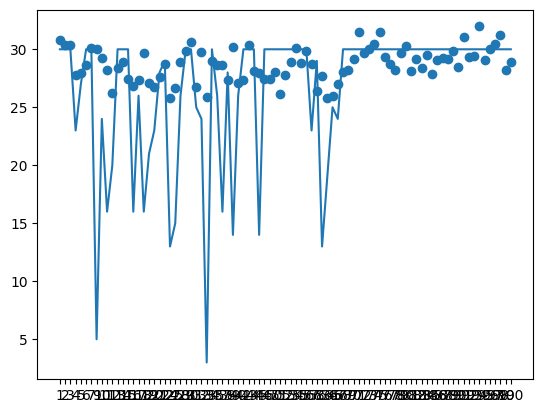

In [10]:
import matplotlib.pyplot as plt
plt.scatter(WhisperForAudioClassification_v2_15k_name, WhisperForAudioClassification_v2_15k_hyps)
plt.plot(WhisperForAudioClassification_v2_15k_name, WhisperForAudioClassification_v2_15k_truth)
plt.show()

<Axes: >

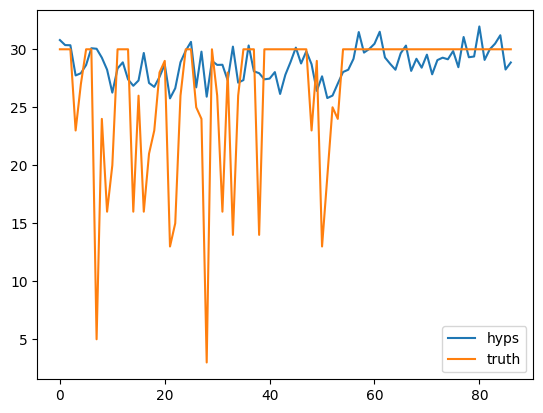

In [11]:
WhisperForAudioClassification_v2_15k_noname = WhisperForAudioClassification_v2_15k
WhisperForAudioClassification_v2_15k_noname = WhisperForAudioClassification_v2_15k_noname.drop(['name'], axis=1)
WhisperForAudioClassification_v2_15k_noname.plot()

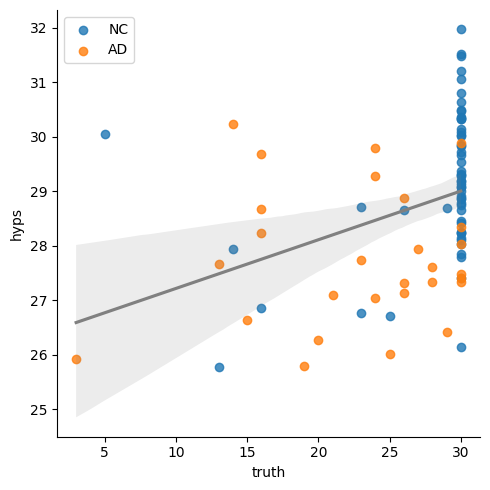

In [12]:
import seaborn as sns
from scipy import stats

# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(WhisperForAudioClassification_v2_15k['truth'],WhisperForAudioClassification_v2_15k['hyps'])

# Use lmplot to plot scatter points
sns.lmplot(x='truth', y='hyps', hue='label', data=WhisperForAudioClassification_v2_15k, fit_reg=False, legend=False)

# Use regplot to plot the regression line and use line_kws to set line label for legend
# ax = sns.regplot(x="truth", y="hyps", data=WhisperForAudioClassification_v2_15k, scatter_kws={"zorder":-1},
# line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept), "color": "green"})
ax = sns.regplot(x="truth", y="hyps", data=WhisperForAudioClassification_v2_15k, scatter_kws={"zorder":-1, "color": "white"}, line_kws={"color": "gray"})

# plot legend
ax.legend()

# save the plot as PNG file
plt.savefig("MMSE_v2.png")
plt.savefig("MMSE_v2.jpg")

<Axes: xlabel='truth', ylabel='hyps'>

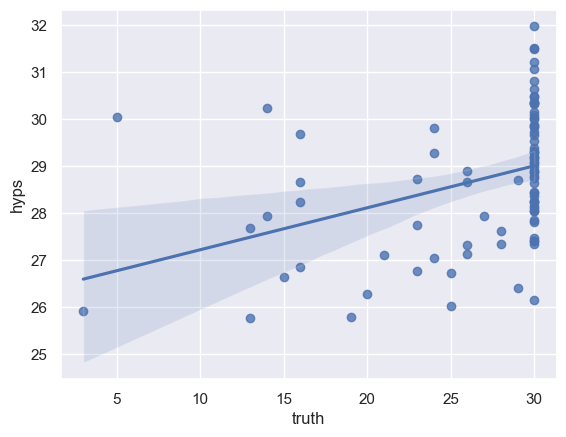

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(color_codes=True)
tips = sns.load_dataset("tips")
sns.regplot(x="truth", y="hyps", data=WhisperForAudioClassification_v2_15k)

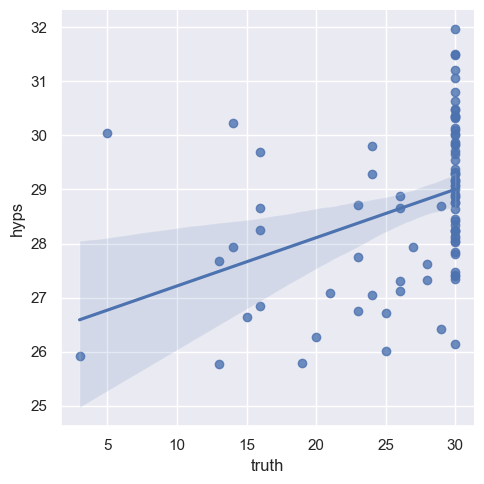

In [14]:
sns.lmplot(x="truth", y="hyps", data=WhisperForAudioClassification_v2_15k)

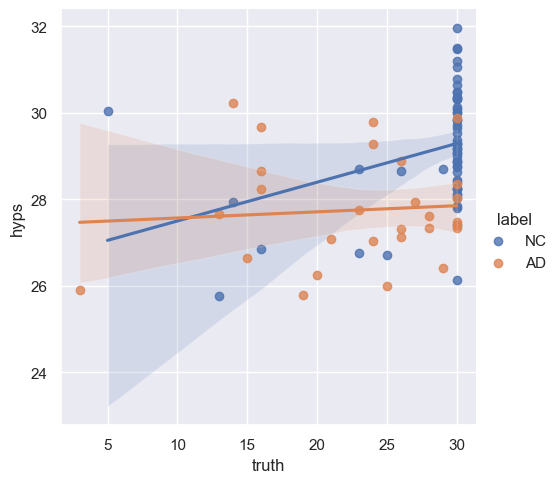

In [15]:
sns.lmplot(x="truth", y="hyps", hue="label", data=WhisperForAudioClassification_v2_15k)

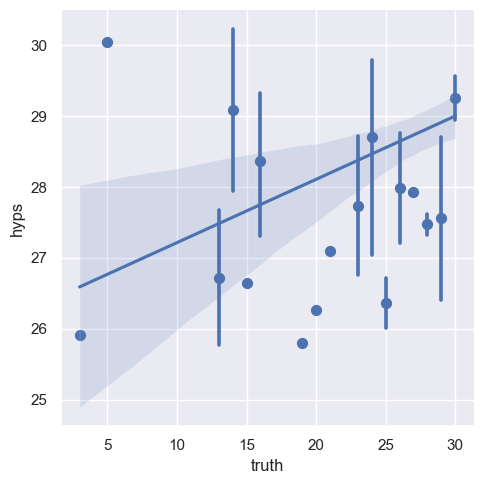

In [16]:
sns.lmplot(x="truth", y="hyps", data=WhisperForAudioClassification_v2_15k, x_estimator=np.mean);

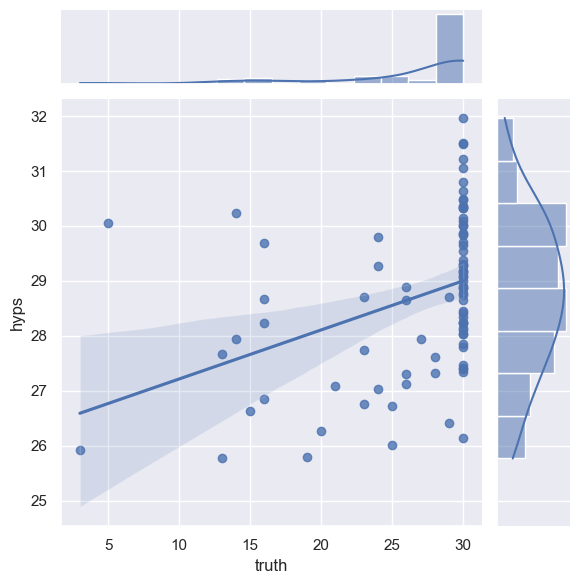

In [17]:
sns.jointplot(x="truth", y="hyps", data=WhisperForAudioClassification_v2_15k, kind="reg")

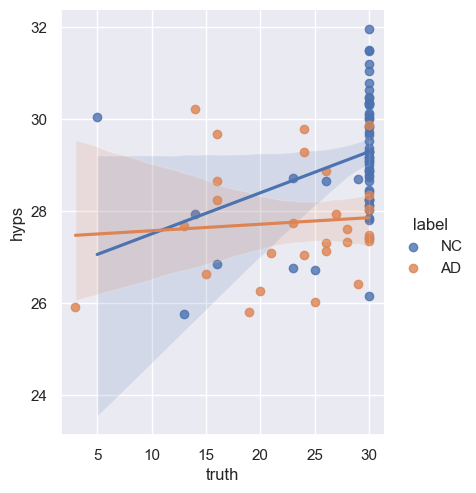

In [18]:
sns.pairplot(WhisperForAudioClassification_v2_15k, x_vars="truth", y_vars="hyps", hue="label", height=5, aspect=.8, kind="reg")

In [19]:
# decision_tree_result = pd.DataFrame()
train_mae = []
test_mae = []

fivefolds1_steps = pd.read_csv('whisper-WhisperForAudioClassification-v2-15k1.csv')
fivefolds1_hyps = fivefolds1_steps['hyps'].tolist()
fivefolds1_truth = [int(i) for i in fivefolds1_steps['truth'].tolist()]
fivefolds1_name = [str(i).replace("CTT", "") for i in fivefolds1_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds1_truth, fivefolds1_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds1_truth, fivefolds1_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds1_truth, fivefolds1_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds1_truth, fivefolds1_hyps)))
print('r2: ', metrics.r2_score(fivefolds1_truth, fivefolds1_hyps))
test_mae1 = metrics.mean_absolute_error(fivefolds1_truth, fivefolds1_hyps)
test_mae.append(test_mae1)
train_mae1 = (total_mae*len(WhisperForAudioClassification_v2_15k_name) - test_mae1*len(fivefolds1_name)) / (len(WhisperForAudioClassification_v2_15k_name) - len(fivefolds1_name))
train_mae.append(train_mae1)

fivefolds2_steps = pd.read_csv('whisper-WhisperForAudioClassification-v2-15k2.csv')
fivefolds2_hyps = fivefolds2_steps['hyps'].tolist()
fivefolds2_truth = [int(i) for i in fivefolds2_steps['truth'].tolist()]
fivefolds2_name = [str(i).replace("CTT", "") for i in fivefolds2_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds2_truth, fivefolds2_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds2_truth, fivefolds2_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds2_truth, fivefolds2_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds2_truth, fivefolds2_hyps)))
print('r2: ', metrics.r2_score(fivefolds2_truth, fivefolds2_hyps))
test_mae2 = metrics.mean_absolute_error(fivefolds2_truth, fivefolds2_hyps)
test_mae.append(test_mae2)
train_mae2 = (total_mae*len(WhisperForAudioClassification_v2_15k_name) - test_mae1*len(fivefolds2_name)) / (len(WhisperForAudioClassification_v2_15k_name) - len(fivefolds2_name))
train_mae.append(train_mae2)

fivefolds3_steps = pd.read_csv('whisper-WhisperForAudioClassification-v2-15k3.csv')
fivefolds3_hyps = fivefolds3_steps['hyps'].tolist()
fivefolds3_truth = [int(i) for i in fivefolds3_steps['truth'].tolist()]
fivefolds3_name = [str(i).replace("CTT", "") for i in fivefolds3_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds3_truth, fivefolds3_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds3_truth, fivefolds3_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds3_truth, fivefolds3_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds3_truth, fivefolds3_hyps)))
print('r2: ', metrics.r2_score(fivefolds3_truth, fivefolds3_hyps))
test_mae3 = metrics.mean_absolute_error(fivefolds3_truth, fivefolds3_hyps)
test_mae.append(test_mae3)
train_mae3 = (total_mae*len(WhisperForAudioClassification_v2_15k_name) - test_mae1*len(fivefolds3_name)) / (len(WhisperForAudioClassification_v2_15k_name) - len(fivefolds3_name))
train_mae.append(train_mae3)

fivefolds4_steps = pd.read_csv('whisper-WhisperForAudioClassification-v2-15k4.csv')
fivefolds4_hyps = fivefolds4_steps['hyps'].tolist()
fivefolds4_truth = [int(i) for i in fivefolds4_steps['truth'].tolist()]
fivefolds4_name = [str(i).replace("CTT", "") for i in fivefolds4_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds4_truth, fivefolds4_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds4_truth, fivefolds4_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds4_truth, fivefolds4_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds4_truth, fivefolds4_hyps)))
print('r2: ', metrics.r2_score(fivefolds4_truth, fivefolds4_hyps))
test_mae4 = metrics.mean_absolute_error(fivefolds4_truth, fivefolds4_hyps)
test_mae.append(test_mae4)
train_mae4 = (total_mae*len(WhisperForAudioClassification_v2_15k_name) - test_mae1*len(fivefolds4_name)) / (len(WhisperForAudioClassification_v2_15k_name) - len(fivefolds4_name))
train_mae.append(train_mae4)

fivefolds5_steps = pd.read_csv('whisper-WhisperForAudioClassification-v2-15k5.csv')
fivefolds5_hyps = fivefolds5_steps['hyps'].tolist()
fivefolds5_truth = [int(i) for i in fivefolds5_steps['truth'].tolist()]
fivefolds5_name = [str(i).replace("CTT", "") for i in fivefolds5_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds5_truth, fivefolds5_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds5_truth, fivefolds5_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds5_truth, fivefolds5_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds5_truth, fivefolds5_hyps)))
print('r2: ', metrics.r2_score(fivefolds5_truth, fivefolds5_hyps))
test_mae5 = metrics.mean_absolute_error(fivefolds5_truth, fivefolds5_hyps)
test_mae.append(test_mae5)
train_mae5 = (total_mae*len(WhisperForAudioClassification_v2_15k_name) - test_mae1*len(fivefolds5_name)) / (len(WhisperForAudioClassification_v2_15k_name) - len(fivefolds5_name))
train_mae.append(train_mae5)

array = np.stack((train_mae, test_mae), axis=1)
decision_tree_result = pd.DataFrame(array,  columns = ['train_mae', 'test_mae'])
# decision_tree_result = pd.DataFrame(test_mae,  columns = ['test_mae'])
decision_tree_result

evs:  0.17212905827518943
mae:  3.4994810003983345
mse:  38.96463980295467
rmse:  6.2421662748564035
r2:  0.12501648613668592
evs:  0.12841629251081432
mae:  4.706109152899848
mse:  52.060647801967804
rmse:  7.215306493972921
r2:  -0.20277024300039725
evs:  -0.0017412756167287657
mae:  2.54535473094267
mse:  17.038437288938013
rmse:  4.127764199774257
r2:  -0.13825898670898895
evs:  0.060081216905496504
mae:  3.4162772683536304
mse:  53.61166971539933
rmse:  7.321999024542364
r2:  -0.09218754742354474
evs:  0.31345036095581114
mae:  2.596181154251098
mse:  16.5775047091115
rmse:  4.071548195602197
r2:  0.2826502357111994


,train_mae,test_mae
0,3.347009,3.499481
1,3.349219,4.706109
2,3.351365,2.545355
3,3.351365,3.416277
4,3.353451,2.596181


In [20]:
# Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.0, 0.3)
        plt.bar(X_axis-0.2, train_data, 0.4, color='steelblue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='lightsteelblue', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

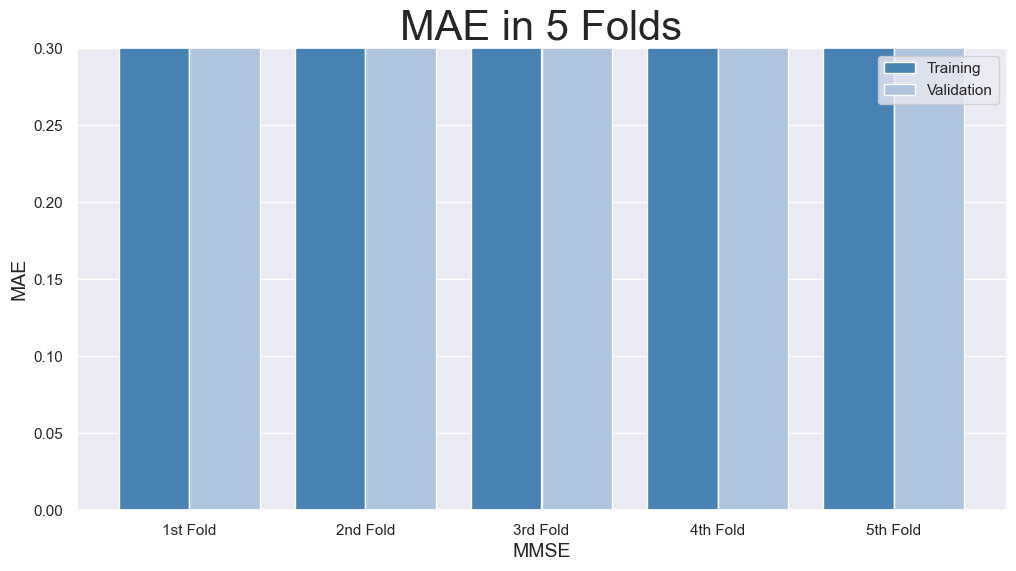

In [21]:
model_name = "MMSE"
plot_result(model_name,
            "MAE",
            "MAE in 5 Folds",
            decision_tree_result["train_mae"],
            decision_tree_result["test_mae"])

## BERT

In [4]:
bert_v2_15k = pd.read_csv('bert-v2-15k.csv')
# fivefolds_1k['result'] = np.where(fivefolds_1k['hyps'] >= 0.5,1,0)
# bert_v2_15k['name'] =  bert_v2_15k['name'].str.split('\\').str.get(-1)
# bert_v2_15k['name'] =  bert_v2_15k['name'].str.split('C').str.get(0).astype(int)
bert_v2_15k['name'] =  bert_v2_15k['name'].astype(int)
bert_v2_15k = bert_v2_15k.sort_values(by=['name'])
bert_v2_15k = bert_v2_15k.reset_index(drop=True)
bert_v2_15k['label'] = fivefolds_label['label']
bert_v2_15k.head(50)

,name,hyps,truth,ifcorrect,label
0,1,29.220514,30.0,False,NC
1,2,30.846252,30.0,False,NC
2,3,30.615204,30.0,False,NC
3,4,28.471485,23.0,False,AD
4,5,28.579216,27.0,False,AD
5,6,30.061993,30.0,False,NC
6,7,30.519348,30.0,False,NC
7,9,25.429588,5.0,False,NC
8,10,27.522207,24.0,False,AD
9,11,23.281668,16.0,False,AD


In [5]:
bert_v2_15k.tail(38)

,name,hyps,truth,ifcorrect,label
49,58,26.217054,29.0,False,AD
50,63,29.449245,13.0,False,AD
51,64,26.319603,19.0,False,AD
52,65,26.983986,25.0,False,AD
53,67,26.980824,24.0,False,AD
54,68,26.189262,30.0,False,AD
55,69,27.799726,30.0,False,NC
56,70,29.411345,30.0,False,NC
57,71,28.645374,30.0,False,NC
58,72,30.093008,30.0,False,NC


In [6]:
bert_v2_15k_result = bert_v2_15k['ifcorrect'].tolist()
bert_v2_15k_hyps = bert_v2_15k['hyps'].tolist()
# fivefolds_1_truth = [int(i) for i in fivefolds_1k['truth'].tolist()]
bert_v2_15k_truth = bert_v2_15k['truth'].tolist()

In [7]:
bert_v2_15k_label = bert_v2_15k['label'].tolist()
bert_v2_15k_hyps = [float(i) for i in bert_v2_15k['hyps'].tolist()]
bert_v2_15k_truth = [float(i) for i in bert_v2_15k['truth'].tolist()]
bert_v2_15k_name = [str(i).replace("CTT", "") for i in bert_v2_15k['name'].tolist()]

In [8]:
# print(classification_report(fivefolds_1_truth, fivefolds_1_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_1_truth, fivefolds_1_result).ravel()
# print('sensitivuty: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_1_truth), np.array(fivefolds_1_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

print('evs: ', metrics.explained_variance_score(bert_v2_15k_truth, bert_v2_15k_hyps))
print('mae: ', metrics.mean_absolute_error(bert_v2_15k_truth, bert_v2_15k_hyps))
print('mse: ', metrics.mean_squared_error(bert_v2_15k_truth, bert_v2_15k_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(bert_v2_15k_truth, bert_v2_15k_hyps)))
print('r2: ', metrics.r2_score(bert_v2_15k_truth, bert_v2_15k_hyps))
total_mae = metrics.mean_absolute_error(bert_v2_15k_truth, bert_v2_15k_hyps)

evs:  0.11119410979886524
mae:  3.5603244715723497
mse:  34.220881013112844
rmse:  5.849861623415792
r2:  0.056717426624770195


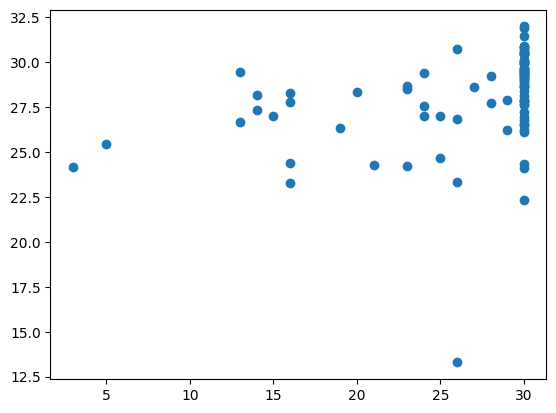

In [9]:
import matplotlib.pyplot as plt
plt.scatter(bert_v2_15k_truth, bert_v2_15k_hyps)
# plt.plot(list(range(len(fivefolds_1_truth))), fivefolds_1_hyps)
plt.show()

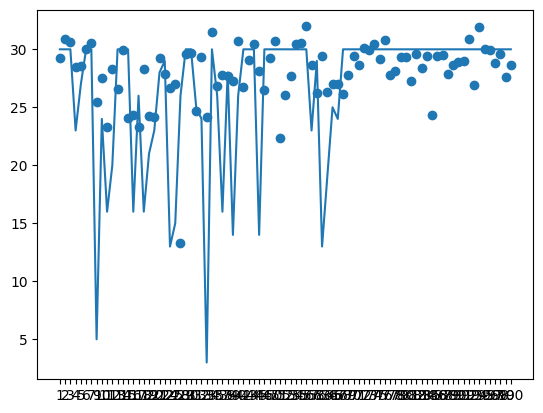

In [10]:
import matplotlib.pyplot as plt
plt.scatter(bert_v2_15k_name, bert_v2_15k_hyps)
plt.plot(bert_v2_15k_name, bert_v2_15k_truth)
plt.show()

<Axes: >

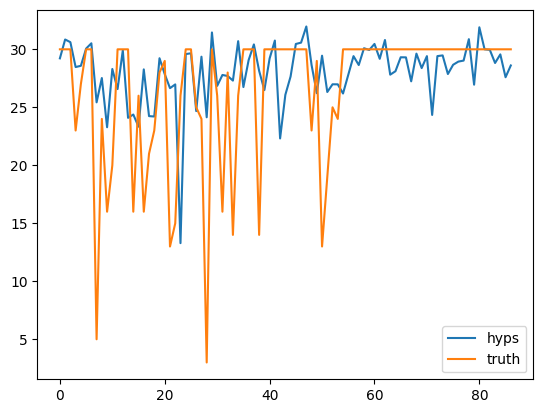

In [11]:
bert_v2_15k_noname = bert_v2_15k
bert_v2_15k_noname = bert_v2_15k_noname.drop(['name'], axis=1)
bert_v2_15k_noname.plot()

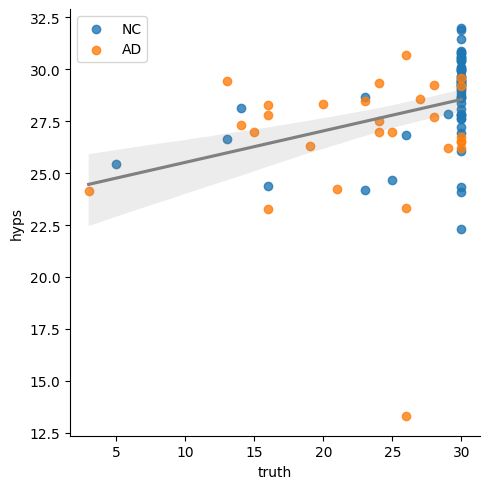

In [12]:
import seaborn as sns
from scipy import stats

# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(bert_v2_15k['truth'],bert_v2_15k['hyps'])

# Use lmplot to plot scatter points
sns.lmplot(x='truth', y='hyps', hue='label', data=bert_v2_15k, fit_reg=False, legend=False)

# Use regplot to plot the regression line and use line_kws to set line label for legend
# ax = sns.regplot(x="truth", y="hyps", data=bert_v2_15k, scatter_kws={"zorder":-1},
# line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept), "color": "green"})
ax = sns.regplot(x="truth", y="hyps", data=bert_v2_15k, scatter_kws={"zorder":-1, "color": "white"}, line_kws={"color": "gray"})

# plot legend
ax.legend()

# save the plot as PNG file
plt.savefig("MMSE_v2_bert.png")
plt.savefig("MMSE_v2_bert.jpg")

<Axes: xlabel='truth', ylabel='hyps'>

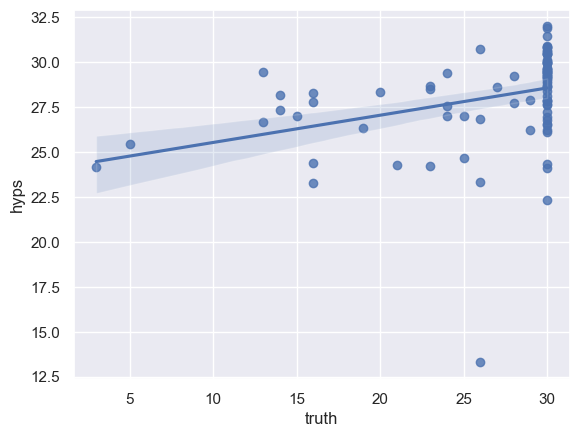

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(color_codes=True)
tips = sns.load_dataset("tips")
sns.regplot(x="truth", y="hyps", data=bert_v2_15k)

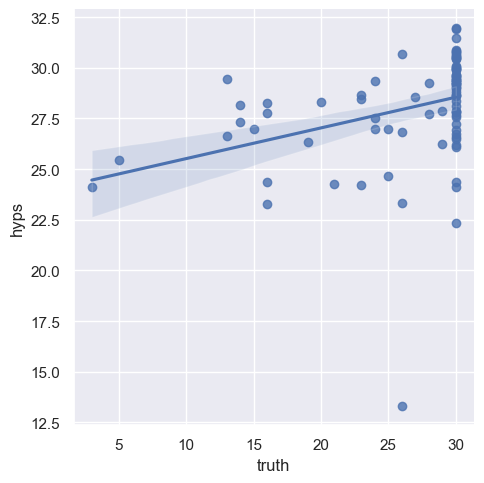

In [14]:
sns.lmplot(x="truth", y="hyps", data=bert_v2_15k)

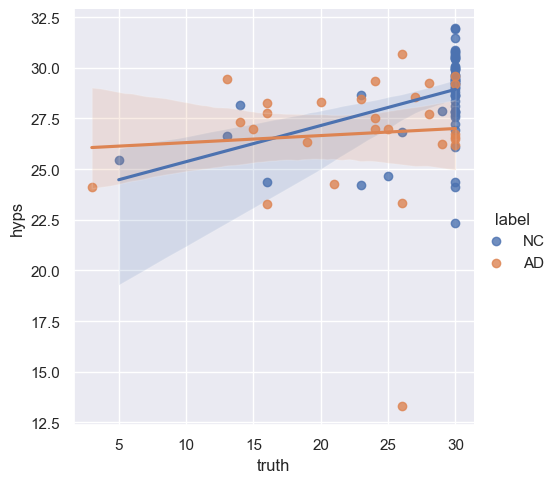

In [15]:
sns.lmplot(x="truth", y="hyps", hue="label", data=bert_v2_15k)

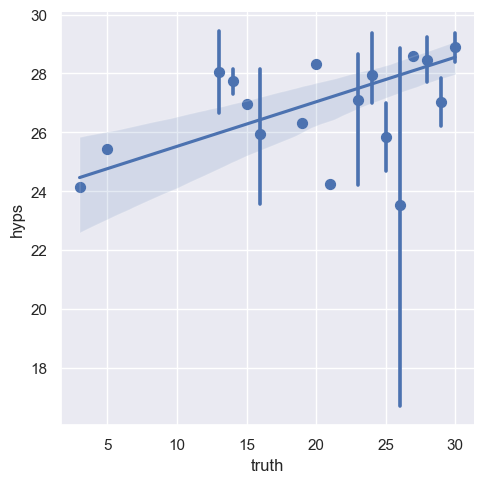

In [16]:
sns.lmplot(x="truth", y="hyps", data=bert_v2_15k, x_estimator=np.mean);

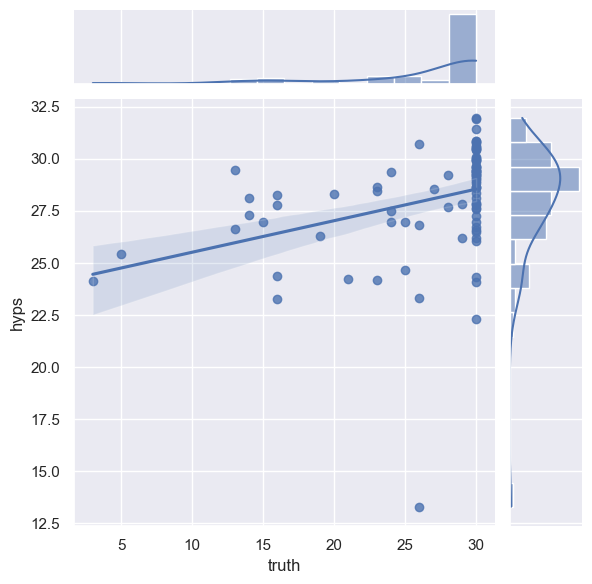

In [17]:
sns.jointplot(x="truth", y="hyps", data=bert_v2_15k, kind="reg")

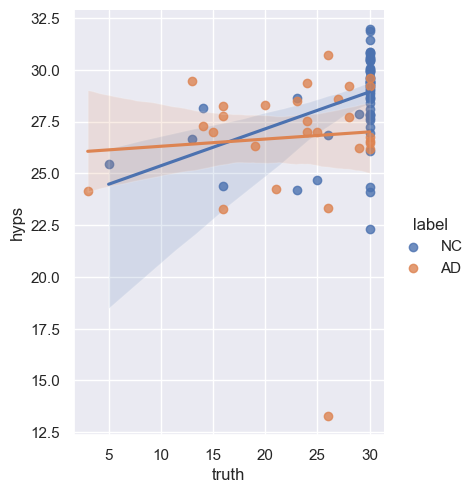

In [18]:
sns.pairplot(bert_v2_15k, x_vars="truth", y_vars="hyps", hue="label", height=5, aspect=.8, kind="reg")

In [19]:
# decision_tree_result = pd.DataFrame()
train_mae = []
test_mae = []

fivefolds1_steps = pd.read_csv('bert-v2-15k1.csv')
fivefolds1_hyps = fivefolds1_steps['hyps'].tolist()
fivefolds1_truth = [int(i) for i in fivefolds1_steps['truth'].tolist()]
fivefolds1_name = [str(i).replace("CTT", "") for i in fivefolds1_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds1_truth, fivefolds1_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds1_truth, fivefolds1_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds1_truth, fivefolds1_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds1_truth, fivefolds1_hyps)))
print('r2: ', metrics.r2_score(fivefolds1_truth, fivefolds1_hyps))
test_mae1 = metrics.mean_absolute_error(fivefolds1_truth, fivefolds1_hyps)
test_mae.append(test_mae1)
train_mae1 = (total_mae*len(bert_v2_15k_name) - test_mae1*len(fivefolds1_name)) / (len(bert_v2_15k_name) - len(fivefolds1_name))
train_mae.append(train_mae1)

fivefolds2_steps = pd.read_csv('bert-v2-15k2.csv')
fivefolds2_hyps = fivefolds2_steps['hyps'].tolist()
fivefolds2_truth = [int(i) for i in fivefolds2_steps['truth'].tolist()]
fivefolds2_name = [str(i).replace("CTT", "") for i in fivefolds2_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds2_truth, fivefolds2_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds2_truth, fivefolds2_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds2_truth, fivefolds2_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds2_truth, fivefolds2_hyps)))
print('r2: ', metrics.r2_score(fivefolds2_truth, fivefolds2_hyps))
test_mae2 = metrics.mean_absolute_error(fivefolds2_truth, fivefolds2_hyps)
test_mae.append(test_mae2)
train_mae2 = (total_mae*len(bert_v2_15k_name) - test_mae1*len(fivefolds2_name)) / (len(bert_v2_15k_name) - len(fivefolds2_name))
train_mae.append(train_mae2)

fivefolds3_steps = pd.read_csv('bert-v2-15k3.csv')
fivefolds3_hyps = fivefolds3_steps['hyps'].tolist()
fivefolds3_truth = [int(i) for i in fivefolds3_steps['truth'].tolist()]
fivefolds3_name = [str(i).replace("CTT", "") for i in fivefolds3_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds3_truth, fivefolds3_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds3_truth, fivefolds3_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds3_truth, fivefolds3_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds3_truth, fivefolds3_hyps)))
print('r2: ', metrics.r2_score(fivefolds3_truth, fivefolds3_hyps))
test_mae3 = metrics.mean_absolute_error(fivefolds3_truth, fivefolds3_hyps)
test_mae.append(test_mae3)
train_mae3 = (total_mae*len(bert_v2_15k_name) - test_mae1*len(fivefolds3_name)) / (len(bert_v2_15k_name) - len(fivefolds3_name))
train_mae.append(train_mae3)

fivefolds4_steps = pd.read_csv('bert-v2-15k4.csv')
fivefolds4_hyps = fivefolds4_steps['hyps'].tolist()
fivefolds4_truth = [int(i) for i in fivefolds4_steps['truth'].tolist()]
fivefolds4_name = [str(i).replace("CTT", "") for i in fivefolds4_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds4_truth, fivefolds4_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds4_truth, fivefolds4_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds4_truth, fivefolds4_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds4_truth, fivefolds4_hyps)))
print('r2: ', metrics.r2_score(fivefolds4_truth, fivefolds4_hyps))
test_mae4 = metrics.mean_absolute_error(fivefolds4_truth, fivefolds4_hyps)
test_mae.append(test_mae4)
train_mae4 = (total_mae*len(bert_v2_15k_name) - test_mae1*len(fivefolds4_name)) / (len(bert_v2_15k_name) - len(fivefolds4_name))
train_mae.append(train_mae4)

fivefolds5_steps = pd.read_csv('bert-v2-15k5.csv')
fivefolds5_hyps = fivefolds5_steps['hyps'].tolist()
fivefolds5_truth = [int(i) for i in fivefolds5_steps['truth'].tolist()]
fivefolds5_name = [str(i).replace("CTT", "") for i in fivefolds5_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds5_truth, fivefolds5_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds5_truth, fivefolds5_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds5_truth, fivefolds5_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds5_truth, fivefolds5_hyps)))
print('r2: ', metrics.r2_score(fivefolds5_truth, fivefolds5_hyps))
test_mae5 = metrics.mean_absolute_error(fivefolds5_truth, fivefolds5_hyps)
test_mae.append(test_mae5)
train_mae5 = (total_mae*len(bert_v2_15k_name) - test_mae1*len(fivefolds5_name)) / (len(bert_v2_15k_name) - len(fivefolds5_name))
train_mae.append(train_mae5)

array = np.stack((train_mae, test_mae), axis=1)
decision_tree_result = pd.DataFrame(array,  columns = ['train_mae', 'test_mae'])
# decision_tree_result = pd.DataFrame(test_mae,  columns = ['test_mae'])
decision_tree_result

evs:  -0.024814028437116775
mae:  4.495610136734812
mse:  45.699126117228644
rmse:  6.760112877550836
r2:  -0.026212025896960922
evs:  0.2137045534278743
mae:  4.5494908226860895
mse:  42.71856790556275
rmse:  6.53594430098381
r2:  0.013062179021510856
evs:  0.008888139004202378
mae:  2.4777226167566644
mse:  15.062120555620133
rmse:  3.8809947894348085
r2:  -0.006230430091127781
evs:  0.18710807008983577
mae:  3.7849604662726914
mse:  47.61315274296944
rmse:  6.900228455853432
r2:  0.03001542769503962
evs:  0.31671008597306327
mae:  2.248449325561524
mse:  17.157461471082577
rmse:  4.142156620781327
r2:  0.2575540675123158


,train_mae,test_mae
0,3.298995,4.495610
1,3.316337,4.549491
2,3.333184,2.477723
3,3.333184,3.784960
4,3.349556,2.248449


In [20]:
# Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.0, 0.3)
        plt.bar(X_axis-0.2, train_data, 0.4, color='steelblue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='lightsteelblue', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

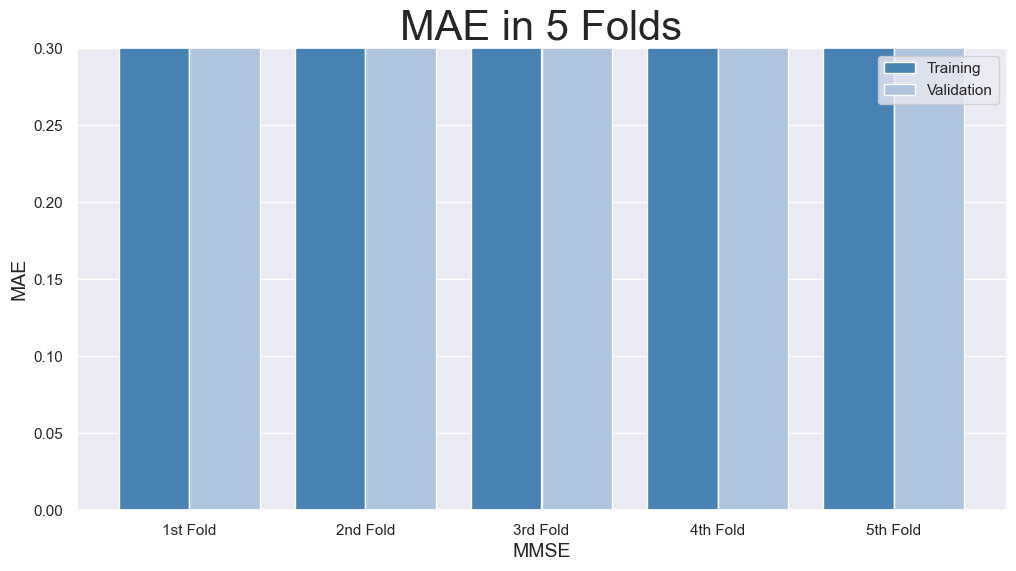

In [21]:
model_name = "MMSE"
plot_result(model_name,
            "MAE",
            "MAE in 5 Folds",
            decision_tree_result["train_mae"],
            decision_tree_result["test_mae"])